In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read dataset files
df = pd.read_csv('dataset/train_data_cleaned.csv')
df.head()

,age,no_of_children,net_yearly_income,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,...,occupation_type_Low-skill Laborers,occupation_type_Managers,occupation_type_Medicine staff,occupation_type_Private service staff,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Unknown,occupation_type_Waiters/barmen staff
0,46,0.0,107934.04,1.0,1.0,33070.28,18690.93,73,544.0,2,...,0,0,0,0,0,0,0,0,1,0
1,29,0.0,109862.62,2.0,0.0,15329.53,37745.19,52,857.0,0,...,0,0,0,0,0,0,0,0,0,0
2,37,0.0,230153.17,2.0,0.0,48416.60,41598.36,43,650.0,0,...,0,0,0,0,0,0,0,0,0,0
3,39,0.0,122325.82,2.0,0.0,22574.36,32627.76,20,754.0,0,...,0,0,0,0,0,0,0,0,0,0
4,46,0.0,387286.00,1.0,0.0,38282.95,52950.64,75,927.0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Split features and labels
X = df.drop('credit_card_default', axis=1)
y = df['credit_card_default']
target_names = ["no-default", "default"]

print(X.shape, y.shape)

(43508, 32) (43508,)


In [4]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [5]:
from sklearn.preprocessing import StandardScaler
# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

In [6]:
# Transform the training and testing data using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [7]:
from tensorflow.keras.utils import to_categorical

# One-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)
y_train_categorical

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [8]:
X_train_scaled.shape

(32631, 32)

### Create a Neural Network Model with 1 Hiden Layer

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [10]:
# Create model and add 1 hiden layers
model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dense(units=2, activation='softmax'))

In [11]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               3300      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 202       
Total params: 3,502
Trainable params: 3,502
Non-trainable params: 0
_________________________________________________________________


In [13]:
history = model.fit(X_train_scaled, 
                    y_train_categorical, 
                    epochs=100,
                    shuffle=True,
                    verbose=2,                    
                    validation_data=(X_test_scaled, y_test_categorical)
                   )

Epoch 1/100
1020/1020 - 2s - loss: 0.0950 - accuracy: 0.9680 - val_loss: 0.0556 - val_accuracy: 0.9788
Epoch 2/100
1020/1020 - 1s - loss: 0.0519 - accuracy: 0.9798 - val_loss: 0.0554 - val_accuracy: 0.9790
Epoch 3/100
1020/1020 - 1s - loss: 0.0494 - accuracy: 0.9795 - val_loss: 0.0557 - val_accuracy: 0.9757
Epoch 4/100
1020/1020 - 1s - loss: 0.0480 - accuracy: 0.9801 - val_loss: 0.0538 - val_accuracy: 0.9780
Epoch 5/100
1020/1020 - 1s - loss: 0.0476 - accuracy: 0.9805 - val_loss: 0.0538 - val_accuracy: 0.9773
Epoch 6/100
1020/1020 - 1s - loss: 0.0479 - accuracy: 0.9807 - val_loss: 0.0543 - val_accuracy: 0.9790
Epoch 7/100
1020/1020 - 1s - loss: 0.0466 - accuracy: 0.9808 - val_loss: 0.0550 - val_accuracy: 0.9768
Epoch 8/100
1020/1020 - 1s - loss: 0.0462 - accuracy: 0.9808 - val_loss: 0.0534 - val_accuracy: 0.9787
Epoch 9/100
1020/1020 - 1s - loss: 0.0451 - accuracy: 0.9807 - val_loss: 0.0543 - val_accuracy: 0.9778
Epoch 10/100
1020/1020 - 1s - loss: 0.0449 - accuracy: 0.9810 - val_loss:

Epoch 80/100
1020/1020 - 1s - loss: 0.0271 - accuracy: 0.9884 - val_loss: 0.0753 - val_accuracy: 0.9727
Epoch 81/100
1020/1020 - 1s - loss: 0.0275 - accuracy: 0.9879 - val_loss: 0.0758 - val_accuracy: 0.9733
Epoch 82/100
1020/1020 - 1s - loss: 0.0274 - accuracy: 0.9878 - val_loss: 0.0747 - val_accuracy: 0.9729
Epoch 83/100
1020/1020 - 1s - loss: 0.0269 - accuracy: 0.9878 - val_loss: 0.0774 - val_accuracy: 0.9757
Epoch 84/100
1020/1020 - 1s - loss: 0.0272 - accuracy: 0.9884 - val_loss: 0.0793 - val_accuracy: 0.9736
Epoch 85/100
1020/1020 - 1s - loss: 0.0276 - accuracy: 0.9887 - val_loss: 0.0784 - val_accuracy: 0.9733
Epoch 86/100
1020/1020 - 1s - loss: 0.0262 - accuracy: 0.9887 - val_loss: 0.0796 - val_accuracy: 0.9751
Epoch 87/100
1020/1020 - 1s - loss: 0.0264 - accuracy: 0.9884 - val_loss: 0.0775 - val_accuracy: 0.9750
Epoch 88/100
1020/1020 - 1s - loss: 0.0260 - accuracy: 0.9888 - val_loss: 0.0777 - val_accuracy: 0.9745
Epoch 89/100
1020/1020 - 1s - loss: 0.0260 - accuracy: 0.9888 - 

### Create a Deep Learning Model with 2 Hiden Layers

In [14]:
# Create model and add two hiden layers
deep_model = Sequential()
deep_model.add(Dense(units=100, activation='relu', input_dim=X_train_scaled.shape[1]))
deep_model.add(Dense(units=100, activation='relu'))
deep_model.add(Dense(units=2, activation='softmax'))

In [15]:
# Compile and fit the model
deep_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
deep_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 100)               3300      
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 202       
Total params: 13,602
Trainable params: 13,602
Non-trainable params: 0
_________________________________________________________________


In [17]:
deep_history = deep_model.fit(X_train_scaled, 
                    y_train_categorical, 
                    epochs=100,
                    shuffle=True,
                    verbose=2,                    
                    validation_data=(X_test_scaled, y_test_categorical)
                   )

Epoch 1/100
1020/1020 - 1s - loss: 0.0783 - accuracy: 0.9752 - val_loss: 0.0564 - val_accuracy: 0.9779
Epoch 2/100
1020/1020 - 1s - loss: 0.0526 - accuracy: 0.9790 - val_loss: 0.0559 - val_accuracy: 0.9791
Epoch 3/100
1020/1020 - 1s - loss: 0.0488 - accuracy: 0.9795 - val_loss: 0.0600 - val_accuracy: 0.9789
Epoch 4/100
1020/1020 - 1s - loss: 0.0481 - accuracy: 0.9801 - val_loss: 0.0531 - val_accuracy: 0.9787
Epoch 5/100
1020/1020 - 1s - loss: 0.0459 - accuracy: 0.9800 - val_loss: 0.0569 - val_accuracy: 0.9763
Epoch 6/100
1020/1020 - 1s - loss: 0.0451 - accuracy: 0.9810 - val_loss: 0.0529 - val_accuracy: 0.9791
Epoch 7/100
1020/1020 - 1s - loss: 0.0437 - accuracy: 0.9811 - val_loss: 0.0544 - val_accuracy: 0.9791
Epoch 8/100
1020/1020 - 1s - loss: 0.0428 - accuracy: 0.9812 - val_loss: 0.0522 - val_accuracy: 0.9779
Epoch 9/100
1020/1020 - 1s - loss: 0.0415 - accuracy: 0.9820 - val_loss: 0.0548 - val_accuracy: 0.9761
Epoch 10/100
1020/1020 - 1s - loss: 0.0425 - accuracy: 0.9816 - val_loss:

Epoch 80/100
1020/1020 - 1s - loss: 0.0058 - accuracy: 0.9978 - val_loss: 0.2566 - val_accuracy: 0.9720
Epoch 81/100
1020/1020 - 1s - loss: 0.0101 - accuracy: 0.9962 - val_loss: 0.2318 - val_accuracy: 0.9706
Epoch 82/100
1020/1020 - 1s - loss: 0.0074 - accuracy: 0.9971 - val_loss: 0.2298 - val_accuracy: 0.9722
Epoch 83/100
1020/1020 - 1s - loss: 0.0057 - accuracy: 0.9978 - val_loss: 0.2436 - val_accuracy: 0.9717
Epoch 84/100
1020/1020 - 1s - loss: 0.0070 - accuracy: 0.9976 - val_loss: 0.2439 - val_accuracy: 0.9712
Epoch 85/100
1020/1020 - 1s - loss: 0.0084 - accuracy: 0.9971 - val_loss: 0.2443 - val_accuracy: 0.9705
Epoch 86/100
1020/1020 - 1s - loss: 0.0081 - accuracy: 0.9971 - val_loss: 0.2437 - val_accuracy: 0.9704
Epoch 87/100
1020/1020 - 1s - loss: 0.0068 - accuracy: 0.9972 - val_loss: 0.2470 - val_accuracy: 0.9691
Epoch 88/100
1020/1020 - 1s - loss: 0.0087 - accuracy: 0.9968 - val_loss: 0.2512 - val_accuracy: 0.9716
Epoch 89/100
1020/1020 - 1s - loss: 0.0075 - accuracy: 0.9972 - 

### Quantify the Trained Model

In [18]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

340/340 - 0s - loss: 0.0820 - accuracy: 0.9735
Normal Neural Network - Loss: 0.08198703080415726, Accuracy: 0.9735221266746521


In [19]:
deep_model_loss, deep_model_accuracy = deep_model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Deep Learning Neural Network - Loss: {deep_model_loss}, Accuracy: {deep_model_accuracy}")

340/340 - 0s - loss: 0.2937 - accuracy: 0.9732
Deep Learning Neural Network - Loss: 0.29365983605384827, Accuracy: 0.9731543660163879


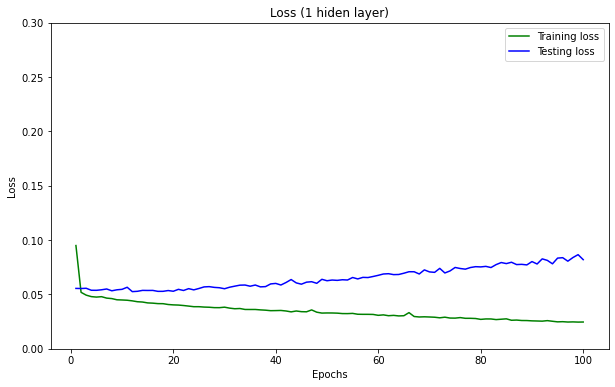

In [20]:
# plot loss for 1 hiden layer

loss_train = history.history['loss']
loss_test = history.history['val_loss']
epochs = range(1,101)
plt.figure(figsize=(10,6))
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_test, 'b', label='Testing loss')
plt.title('Loss (1 hiden layer)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0,0.3)
plt.legend()
plt.show()

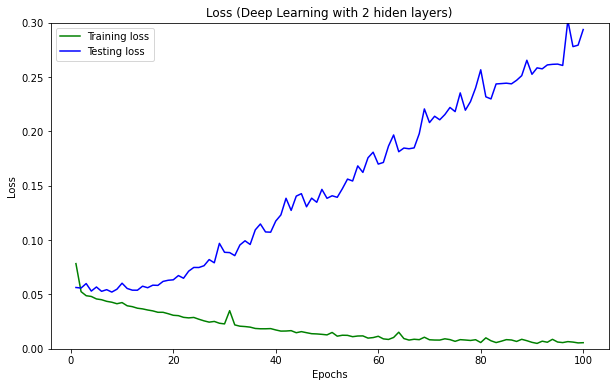

In [21]:
# plot loss with 2 hiden layers
deep_loss_train = deep_history.history['loss']
deep_loss_test = deep_history.history['val_loss']
epochs = range(1,101)
plt.figure(figsize=(10,6))
plt.plot(epochs, deep_loss_train, 'g', label='Training loss')
plt.plot(epochs, deep_loss_test, 'b', label='Testing loss')
plt.title('Loss (Deep Learning with 2 hiden layers)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0,0.3)
plt.legend()
plt.show()

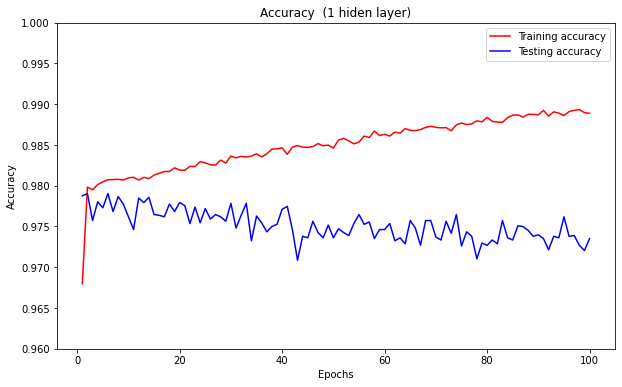

In [22]:
# plot accuracy with 1 hiden layer
accuracy_train = history.history['accuracy']
accuracy_test = history.history['val_accuracy']
epochs = range(1,101)
plt.figure(figsize=(10,6))
plt.plot(epochs, accuracy_train, 'r', label='Training accuracy')
plt.plot(epochs, accuracy_test, 'b', label='Testing accuracy')
plt.title('Accuracy  (1 hiden layer)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0.96,1)
plt.legend()
plt.show()

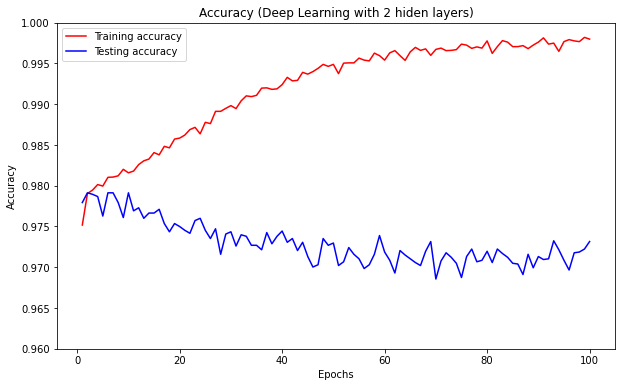

In [23]:
# plot accuracy with 2 hiden layers
deep_accuracy_train = deep_history.history['accuracy']
deep_accuracy_test = deep_history.history['val_accuracy']
epochs = range(1,101)
plt.figure(figsize=(10,6))
plt.plot(epochs, deep_accuracy_train, 'r', label='Training accuracy')
plt.plot(epochs, deep_accuracy_test, 'b', label='Testing accuracy')
plt.title('Accuracy (Deep Learning with 2 hiden layers)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0.96,1)
plt.legend()
plt.show()

### Classification report

In [25]:
from numpy import argmax

In [26]:
 # Calculate classification report
from sklearn.metrics import classification_report
model_predictions = model.predict(X_test_scaled)
print(classification_report(y_test, argmax(model_predictions, axis=1),
                            target_names=target_names))

              precision    recall  f1-score   support

  no-default       0.98      0.99      0.99      9960
     default       0.86      0.81      0.84       917

    accuracy                           0.97     10877
   macro avg       0.92      0.90      0.91     10877
weighted avg       0.97      0.97      0.97     10877



<AxesSubplot:>

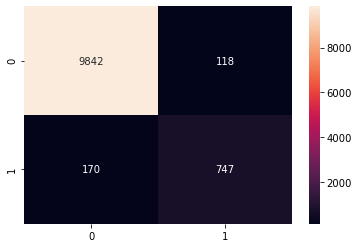

In [27]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix 1 layer
sns.heatmap(confusion_matrix(y_test, argmax(model_predictions, axis=1)), annot = True, fmt="d")

In [28]:
# deep learning model
deep_model_predictions = deep_model.predict(X_test_scaled)
print(classification_report(y_test, argmax(deep_model_predictions, axis=1),
                            target_names=target_names))

              precision    recall  f1-score   support

  no-default       0.98      0.99      0.99      9960
     default       0.86      0.81      0.84       917

    accuracy                           0.97     10877
   macro avg       0.92      0.90      0.91     10877
weighted avg       0.97      0.97      0.97     10877



<AxesSubplot:>

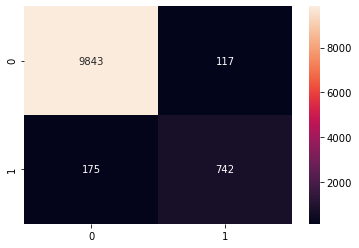

In [29]:
# Confusion Matrix deep learning
sns.heatmap(confusion_matrix(y_test, argmax(deep_model_predictions, axis=1)), annot = True, fmt="d")

In [30]:
# Save the model
model.save("saved_models/neural_network_trained.h5")

In [31]:
# Save the deep learning model
deep_model.save("saved_models/neural_network_deep_trained.h5")

In [32]:
# Load the model
from tensorflow.keras.models import load_model
model_trained = load_model("saved_models/neural_network_trained.h5")
deep_trained = load_model("saved_models/neural_network_deep_trained.h5")

In [33]:
model_loss, model_accuracy = model_trained.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

340/340 - 0s - loss: 0.0820 - accuracy: 0.9735
Normal Neural Network - Loss: 0.08198703080415726, Accuracy: 0.9735221266746521


In [34]:
deep_model_loss, deep_model_accuracy = deep_trained.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Deep Learning Neural Network - Loss: {deep_model_loss}, Accuracy: {deep_model_accuracy}")

340/340 - 0s - loss: 0.2937 - accuracy: 0.9732
Deep Learning Neural Network - Loss: 0.29365983605384827, Accuracy: 0.9731543660163879
